<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/GPGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Synthetic Time Series Data with a Gaussian Process

In [12]:
!pip install GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.0 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


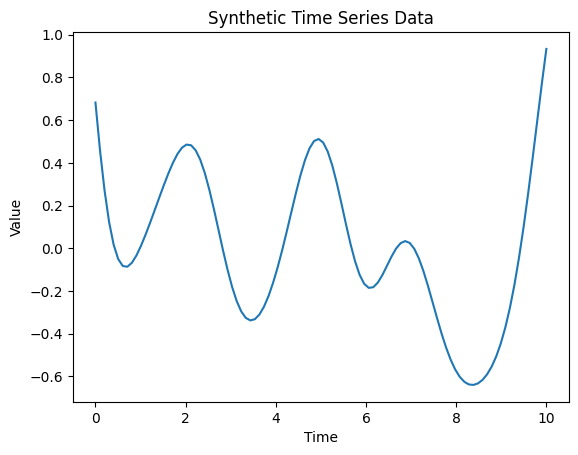

In [13]:
import numpy as np
import GPy

def generate_synthetic_time_series(t, kernel_choice='add', num_kernels=3):
    """
    Generate synthetic time series using a combination of Gaussian Process kernels.

    Parameters:
    t (numpy array): Time points at which to generate the series.
    kernel_choice (str): 'add' for additive kernel, 'mul' for multiplicative kernel.
    num_kernels (int): Number of kernels to combine.

    Returns:
    numpy array: Synthetic time series data.
    """
    # Define base kernels
    linear_kernel = GPy.kern.Linear(1)
    rbf_kernel = GPy.kern.RBF(1)
    periodic_kernel = GPy.kern.PeriodicExponential(1)

    # Collect available kernels
    kernel_bank = [linear_kernel, rbf_kernel, periodic_kernel]

    # Randomly select kernels
    selected_kernels = np.random.choice(kernel_bank, num_kernels, replace=True)

    # Combine kernels
    combined_kernel = selected_kernels[0]
    for kernel in selected_kernels[1:]:
        if kernel_choice == 'add':
            combined_kernel += kernel
        elif kernel_choice == 'mul':
            combined_kernel *= kernel

    # Generate the synthetic time series data
    gp = GPy.models.GPRegression(t[:, None], np.zeros_like(t[:, None]), combined_kernel)
    synthetic_data = gp.posterior_samples_f(t[:, None], size=1).reshape(-1)

    return synthetic_data

# Example usage
t = np.linspace(0, 10, 100)  # Time points
synthetic_data = generate_synthetic_time_series(t, kernel_choice='add', num_kernels=3)

import matplotlib.pyplot as plt
plt.plot(t, synthetic_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.show()


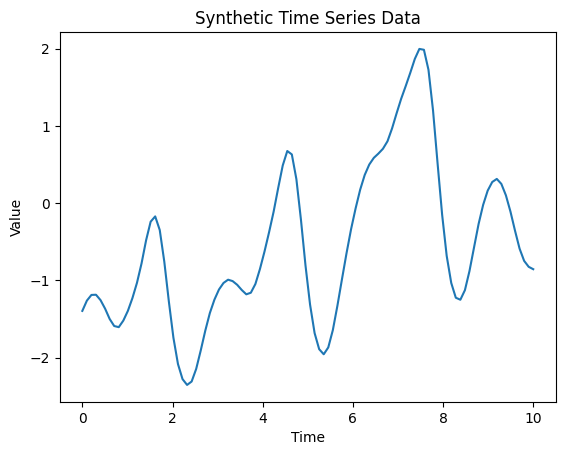

In [14]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, ExpSineSquared
import matplotlib.pyplot as plt

def generate_synthetic_time_series(t, kernel_choice='add', num_kernels=3):
    """
    Generate synthetic time series using a combination of Gaussian Process kernels.

    Parameters:
    t (numpy array): Time points at which to generate the series.
    kernel_choice (str): 'add' for additive kernel, 'mul' for multiplicative kernel.
    num_kernels (int): Number of kernels to combine.

    Returns:
    numpy array: Synthetic time series data.
    """
    # Define base kernels
    linear_kernel = C(1.0) * RBF(length_scale=1.0)
    rbf_kernel = RBF(length_scale=1.0)
    periodic_kernel = ExpSineSquared(length_scale=1.0, periodicity=3.0)

    # Collect available kernels
    kernel_bank = [linear_kernel, rbf_kernel, periodic_kernel]

    # Randomly select kernels
    selected_kernels = np.random.choice(kernel_bank, num_kernels, replace=True)

    # Combine kernels
    combined_kernel = selected_kernels[0]
    for kernel in selected_kernels[1:]:
        if kernel_choice == 'add':
            combined_kernel += kernel
        elif kernel_choice == 'mul':
            combined_kernel *= kernel

    # Add a white noise kernel for numerical stability
    combined_kernel += WhiteKernel(noise_level=1e-5)

    # Generate the synthetic time series data
    gp = GaussianProcessRegressor(kernel=combined_kernel)
    synthetic_data = gp.sample_y(t[:, None], random_state=42).flatten()

    return synthetic_data

# Example usage
t = np.linspace(0, 10, 100)  # Time points
synthetic_data = generate_synthetic_time_series(t, kernel_choice='add', num_kernels=3)

plt.plot(t, synthetic_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Synthetic Time Series Data')
plt.show()
